# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

## 4. Training

### 1. Learning Algorithm
#### 1. Multi Agent Deep Deterministic Policy Gradients (MADPG)

Multi Agent Deep Deterministic Policy Gradients (MADDPG) was utilised to solve a two agent Tennis game. MADDPG contains multiple DDPG agents and DDPG can solve continuous control problems.

#### 2. Description of MADDPG
- The actor network approximates the optimal policy deterministically (best believed action). 
- The critic evaluates the optimal action value function using the best believed action given by the actor network.
- DDPG also uses a `repĺay buffer` where experience tuples are stored.
- Acentralized value functions take into account all states/actions from all agents and this can be trained as a multi-agent system with all agents having a centralized critic and (local) policy; The difficult problem in multi-agent control problem is that the environment is not a MDP anymore if any policy in the system is changed but if the actions of all agents are given, then it will be a MDP again.

Initialize critic networks $Q(s,a|\theta^{Q})$ and actor $\mu(s|\theta^{\mu})$ with weights $\theta^Q$ and $\theta^{\mu}$ 
<br>
Initialize target networks $Q'$ and $\mu'$ with weigths $\theta^{Q'} \leftarrow \theta^Q $ and $\theta^{\mu'} \leftarrow theta^{\mu}$
<br>
Initialize replay buffer R
<br>
 for episode = 1, M do
> Initialize a random process $\mathrm{N}$ for action exploration  
> Receive initial observation state $s_0$
<br>
> for t = 1, T do
>>for each agent i, select action $a_t = µ(s^t|\theta^µ) + N_t$ according to the current policy and exploration noise <br>
>>Execute action at and observe reward rt and observe new state $s_{t+1}$ <br>
>>Store transition ($s_t$, $a_t$, $r_t$, $s_{t+1}$) in R <br>
>>for agent i = 1 to N:<br>
>>>Sample a random minibatch of N transitions ($s_i$, $a_i$, $r_i$, $s_{i+1}$) from R  <br>
>>>Set $y_i = r_i + \gamma Q'(s_{i+1}, \mu'(s_{i+1}|\theta^{µ'})|\theta^{Q'})$ <br>
>>>Update critic by minimizing the loss: $L = \frac{1}{N} \Sigma_i (y_i − Q(s_i , a_i |\theta^Q))^2$ <br>
>>>Update the actor policy using the sampled policy gradient:<br>
>>>$$\nabla_{\theta^{\mu}}J \approx {1}/{S} \Sigma_j \nabla_{\theta_i} Q(s,a| \theta^Q)|_{s=s_j, a = \mu(s_j)}  \nabla_{\theta^{\mu}} \mu (s|\theta^\mu)|_{s_j}$$<br>
>> Update the target networks:
>> $$ \theta^{Q'} \leftarrow \tau \theta^Q + (1-\tau) \theta^{Q'}$$
>> $$ \theta^{\mu'} \leftarrow \tau \mu^Q + (1-\tau) \theta^{\mu'}$$

#### 3. Hyper-parameters

| Parameter Name      | Description           | Value  |
| ------------- |:-------------:| -----:|
| BUFFER_SIZE      | Size of the replay buffer | 5e4 |
| BATCH_SIZE      | Mini-batch size      |   256 |
| GAMMA ($\gamma$) | Discount factor      |   0.99 |
| TAU ($\tau$) |  	 coefficient for soft update of target| 1e-3 |
| LR_ACTOR|Actor learning rate | 1e-4 |
| LR_CRITIC| Critic learning rate| 5e-4 |
| WEIGHT_DECAY_ACTOR| L2 weight decay for ACTOR|0.0|
| WEIGHT_DECAY_CRITIC| L2 weight decay for CRITIC|0.0|
|OU_SIGMA|Ornstein-Uhlenbeck noise parameter, volatility|0.2 |
|OU_THETA|Ornstein-Uhlenbeck noise parameter, speed of mean |0.15|
|EPS_START|reversion initial value for epsilon in noise decay process in Agent.act() |5.0|
|EPS_EP_END|episode to end the noise decay process|300|
|EPS_FINAL|final value for epsilon after decay|0.0|

#### 4. MADDPG layer settings
Each Actor and Critic agents have 3 layers of weights and the size of the each layers are the same, from fine tuning attempts, the fastest number of nodes in hidden layers were `fc1_units=256, fc2_units=128`. These numbers are highly depends on the environments, the number of possible angles and position of the target. The larger nodes in a layer the higher capacity to learn but slower to converge. It is essential to find the optimal number of nodes which is capable of solving the environment with the fastest time. If training score oscilates, the number of nodes needs to be increased as there is not enough room to store learning. If it grows too slow, the number of nodes need to be reduced as it is hard to fill.

In [6]:
from collections import deque
import time
import torch

def maddpg(n_episodes=2000, max_t=1000, print_every=10):
    t0=time.time()
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        score = np.zeros(num_agents)
        agents.reset() # noise reset only currently
        for t in range(max_t):
            action = agents.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            score += rewards
            agents.step(state, action, rewards, next_state, dones)
            state = next_state
            if np.any(dones):
                break 
        score = np.max(score)
        scores.append(score)
        scores_deque.append(np.mean(score))
        average_score = np.mean(scores_deque)

        if i_episode > 0 and i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, average_score))
        if average_score > 0.5:
            print("\nProblem Solved!")
            break
    t1=time.time()

    print("\nTotal time elapsed: {} seconds".format(t1-t0))
    torch.save(agents.agents[0].actor_local.state_dict(), 'tennis_checkpoint_actor_0.pth')
    torch.save(agents.agents[0].critic_local.state_dict(), 'tennis_checkpoint_critic_0.pth') 
    torch.save(agents.agents[1].actor_local.state_dict(), 'tennis_checkpoint_actor_1.pth')
    torch.save(agents.agents[1].critic_local.state_dict(), 'tennis_checkpoint_critic_1.pth')
    
    return scores


In [7]:
from agent import MADDPG
#initialisation of the model
agents = MADDPG(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=10)

In [8]:
n_episodes = 10000
print_every = 50

#training for n_episodes
score = maddpg(n_episodes=n_episodes, print_every=print_every)

Episode 50	Average Score: 0.0020
Episode 100	Average Score: 0.0010
Episode 150	Average Score: 0.0000
Episode 200	Average Score: 0.0000
Episode 250	Average Score: 0.0000
Episode 300	Average Score: 0.0010
Episode 350	Average Score: 0.0083
Episode 400	Average Score: 0.0429
Episode 450	Average Score: 0.0484
Episode 500	Average Score: 0.0241
Episode 550	Average Score: 0.0183
Episode 600	Average Score: 0.0286
Episode 650	Average Score: 0.0414
Episode 700	Average Score: 0.0511
Episode 750	Average Score: 0.0783
Episode 800	Average Score: 0.1045
Episode 850	Average Score: 0.1285
Episode 900	Average Score: 0.1518
Episode 950	Average Score: 0.1957
Episode 1000	Average Score: 0.3049

Problem Solved!

Total time elapsed: 1324.0073173046112 seconds


### 5. Results

#### 1. Discussion on the result plot
The picture below shows how the Multi Agent Deep Deterministic Policy Gradients (MADDPG) was trained with between 1000 to 1050 episodes, around 1030 episodes
The learning algorithms were not finding the policies to score positively early training session. Once agents knows which actions in specific states yields higher rewards, it starts to converge to the policies rather exponentially.
The stable learning after the score of 0.25 shows that the chosen set of hyper parameters are adequate for this environment. However, this stability can be increased by using priortised experience replay or Generalized Advantage Estimation.
OUN noise played an important role in exploration in early training stages, from 0 to 6 episodes. The effect of exploration were recorded as oscilation of score during the stage. After enough exploration, the agents could learn the envionment exponentially.

### 6. Future Work

This DDPG can be augmented with:
- GAE (Generalized Advantage Estimation) : more generalised Advantage estimation
- PER (Priority Experience Replay) : more efficient use of Replay buffer, I have tried it in the other branch. not optimised yet.

Other architectural methods can be applied to solve the environment:
- PPO (Proximal Policy Optimisation)
- A3C.

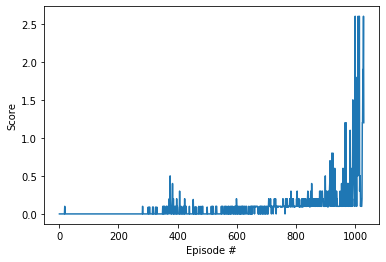

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(score)+1), score)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
agents.agents[0].actor_local.load_state_dict(torch.load('tennis_checkpoint_actor_0.pth'))
agents.agents[0].critic_local.load_state_dict(torch.load('tennis_checkpoint_critic_0.pth'))
agents.agents[1].actor_local.load_state_dict(torch.load('tennis_checkpoint_actor_1.pth'))
agents.agents[1].critic_local.load_state_dict(torch.load('tennis_checkpoint_critic_1.pth'))

env_info = env.reset(train_mode=False)[brain_name]        
states = env_info.vector_observations                  
scores = np.zeros(num_agents)                          

while True:
    actions = agents.act(states, add_noise=False)                    
    env_info = env.step(actions)[brain_name]        
    next_states = env_info.vector_observations        
    rewards = env_info.rewards                        
    dones = env_info.local_done                 
    scores += rewards                         
    states = next_states                              
    if np.any(dones):
        print ("Final score {}".format(scores))
        break

Final score [2.60000004 2.60000004]


In [11]:
env.close()